In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/fast.ai Lesson 2/'

!curl -s https://course.fast.ai/setup/colab | bash

Mounted at /content/gdrive
Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [0]:
path = Path(base_dir + 'data/bodies-of-water')
classes = ['rivers', 'lakes', 'oceans']

In [0]:
for c in classes:
  folder = c
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

In [0]:
dest

PosixPath('/content/gdrive/My Drive/Colab Notebooks/fast.ai Lesson 2/data/bodies-of-water/oceans')

Now upload each .csv to their respective folders in google drive

In [0]:
for c in classes:
  folder = c
  file = 'urls_' + c + '.csv'
  
  dest = path/folder
  download_images(path/folder/file, dest, max_pics=200)
  verify_images(path/folder, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
print(data.classes)
print(data.c)

['lakes', 'oceans', 'rivers']
3


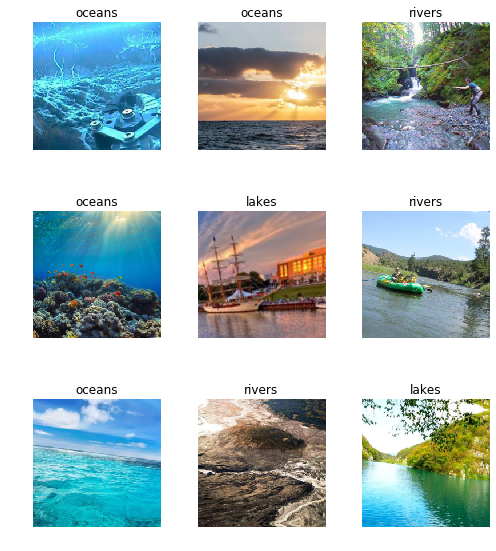

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


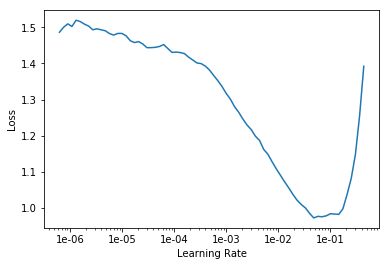

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 0.001

In [0]:
learn.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.357824,0.973084,0.522124,0.477876,00:08
1,1.138581,0.646915,0.212389,0.787611,00:08
2,0.984084,0.570243,0.194690,0.805310,00:09
3,0.868145,0.560267,0.212389,0.787611,00:09


In [0]:
learn.save(base_dir + "stage-1-rn34-water")

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


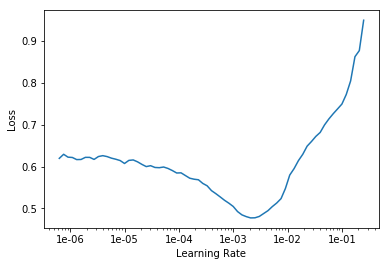

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.load(base_dir + 'stage-1-rn34-water')

In [0]:
learn.fit_one_cycle(4, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.685541,0.553602,0.194690,0.805310,00:09
1,0.636925,0.525757,0.212389,0.787611,00:09
2,0.572756,0.504079,0.194690,0.805310,00:09
3,0.526460,0.500745,0.194690,0.805310,00:09


In [0]:
learn.save(base_dir + 'stage-2-rn34-water')

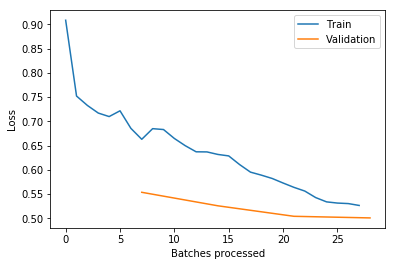

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.load(base_dir + 'stage-2-rn34-water')

Learner(data=ImageDataBunch;

Train: LabelList (453 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rivers,rivers,rivers,rivers,rivers
Path: /content/gdrive/My Drive/Colab Notebooks/fast.ai Lesson 2/data/bodies-of-water;

Valid: LabelList (113 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
oceans,oceans,lakes,oceans,oceans
Path: /content/gdrive/My Drive/Colab Notebooks/fast.ai Lesson 2/data/bodies-of-water;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kern

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

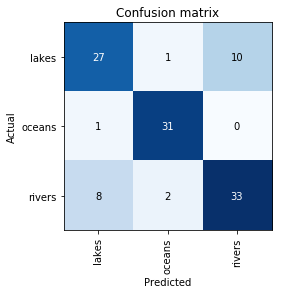

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

db = (ImageList.from_folder(path)
                        .split_none()
                        .label_from_folder()
                        .transform(get_transforms(), size=224)
                        .databunch()
      )

In [0]:
learn_clean = cnn_learner(db, models.resnet34, metrics=[error_rate, accuracy])

learn_clean.load(base_dir + 'stage-2-rn34-water')

In [0]:
# Clean misclassified images

ds, idxs = DatasetFormatter().from_toplosses(learn_clean)
# ImageCleaner(ds, idxs, path)

In [0]:
# Clean duplicate images

ds, idxs = DatasetFormatter.from_similars(learn_clean)
# ImageCleaner(ds, idxs, oath, duplicates=True)

In [0]:
# Recreate the databunch and learn_clean from cleaned.csv
# Retrain everything??

In [0]:
learn.export()

In [0]:
learn.path

PosixPath('/content/gdrive/My Drive/Colab Notebooks/fast.ai Lesson 2/data/bodies-of-water')

In [0]:
defaults.device = torch.device('cpu')

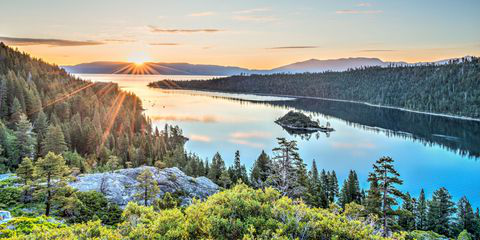

In [0]:
img = open_image(path/'lakes'/'00000064.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class, pred_idx, outputs = learn.predict(img)

In [0]:
pred_class

Category lakes

In [0]:
pred_idx

tensor(0)

In [0]:
outputs

tensor([0.8517, 0.0060, 0.1423])